<a href="https://colab.research.google.com/github/jmmarinr/FisExperimental3/blob/main/DFT_Muestreo_Parseval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
# @title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import *

# Transformada de Fourier

Recordemos la serie de Fourier
$$f(t) = \sum_{n=-\infty}^{\infty} c_n \exp(-i\omega_n t) $$
con pesos complejos
$$c_n = \frac{1}{T} \int_{-T/2}^{T/2} f(t) \exp(i\omega_n t) dt$$


A medida que el periodo $T$ aumenta la separación entre las frecuencias $\omega_n$ de las funciones que componen la sumatoria, y que llamaremos espectro de frecuencias, disminuye de forma tal que cuando el periodo tiende a infinito la sumatoria con pesos $c_n$ se convierte en una integral con coeficiente continuo $F(\omega)$ llamada "Integral de Fourier":

$$f(t) = \int_{-\infty}^{\infty} F(\omega) \exp(i\omega t) \frac{d\omega}{2\pi}$$

y los pesos serán ahora una función continua llamada **Transformada de Fourier**

$$F(\omega) = \int_{-\infty}^{\infty} f(t) \exp(-i\omega t) dt$$


# Transformada discreta de Fourier

$$X_k = \sum_{n=0}^{N-1}x_n e^{-\frac{2\pi i}{N}kn}$$

$k=0,...,N-1$

In [130]:
def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

Simulemos una señal *continua*

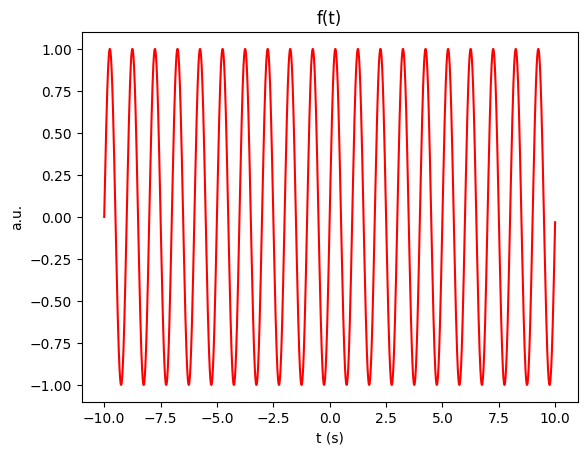

In [131]:
f = 1 # Frecuencia
fs = 200*f # Frecuencia de muestreo
dt = 1/(fs) # Periodo entre muestras para simulación de continuo, segundos
max = 10 # Espacio temporal

##########################
t = np.arange(-max,max,dt)
#ft = np.exp(-(t)**2)
ft = np.sin(2*np.pi*f*t)

plt.plot(t,ft, 'r-')
plt.title('f(t)')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
plt.show()

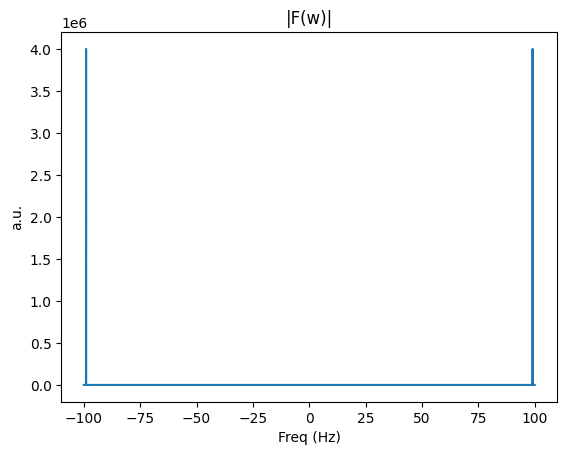

In [132]:
Fw = DFT(ft)
frec = np.linspace(-fs/2,fs/2,len(t))
#omega = 2*np.pi*np.linspace(-1/(2*dt),1/(2*dt),len(t))

plt.plot(frec, abs(Fw)**2)
plt.title('|F(w)|')
plt.xlabel('Freq (Hz)')
plt.ylabel('a.u.')
plt.show()

La anterior imagen nos muestra que la transformada de Fourier es simétrca con respecto al cero y además tenemos dos picos en ciertas posiciones. Vamos a hacer un cambio de coordenadas para observar la información referente a la misma

In [133]:
N = len(Fw)
n = np.arange(N)
n_oneside = N//2
# get the one side frequency
f_oneside = frec[n_oneside:]
Fw_oneside = abs(Fw[:n_oneside])



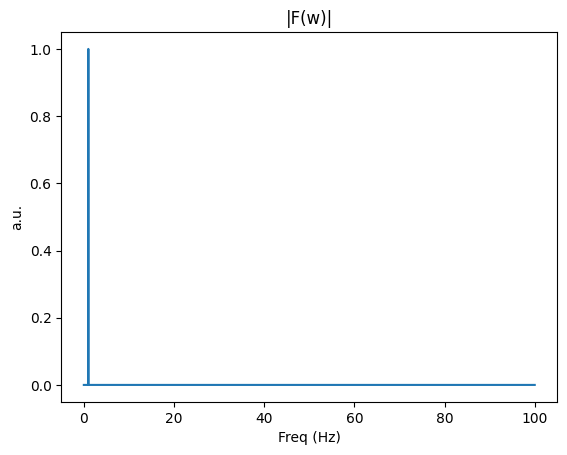

In [134]:
plt.plot(f_oneside, abs(Fw_oneside/np.max(Fw_oneside)))
plt.title('|F(w)|')
plt.xlabel('Freq (Hz)')
plt.ylabel('a.u.')
#plt.xlim(0,10)
plt.show()

# Transformada rápida de Fourier

Usaremos la biblioteca `scipy.fft`. Para ello utilizemos `fft` para hacer la transformada rápida y `fftfreq` para hallar el espectro de frecuencias

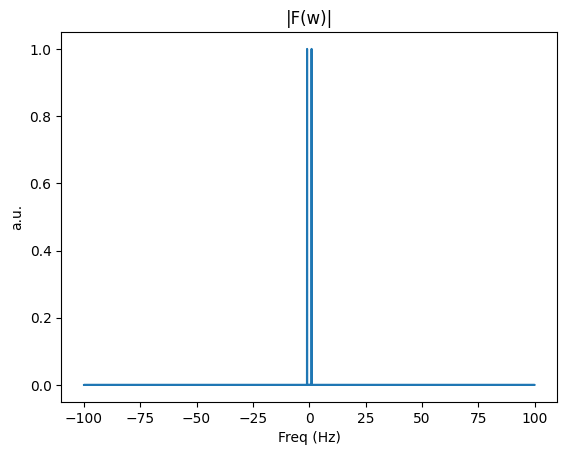

In [135]:
Fw = fft(ft)
frec = fftfreq(len(t),dt)

plt.plot(frec, abs(Fw)/np.max(abs(Fw)))
plt.title('|F(w)|')
plt.xlabel('Freq (Hz)')
plt.ylabel('a.u.')
plt.show()

En nuestro caso solo es necesario quedarnos con la información a la derecha por eso utilizamos `rfft`. Para encontrar la frecuencia asociada a la señal debemos usar `rfftfreq` con parametros de entrada el tamaño del arreglo y la tasa de muestreo usada.

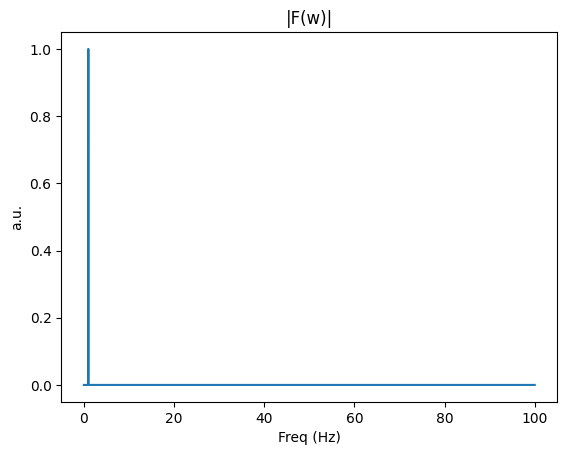

In [136]:
Fw2 = abs(rfft(ft))**2
Fw2 = Fw2/np.max(Fw2)
frec2 = rfftfreq(len(t),dt)

plt.plot(frec2, abs(Fw2))
plt.title('|F(w)|')
plt.xlabel('Freq (Hz)')
plt.ylabel('a.u.')
plt.show()

## Transformada inversa

Si queremos retornar a la función original, solo es necesario usar la transformada inversa de Fourier, esto es, `ifft`

$$x_n = \frac{1}{N} \sum_{k=0}^{N-1}X_k e^{2\pi\frac{k}{N}n}$$

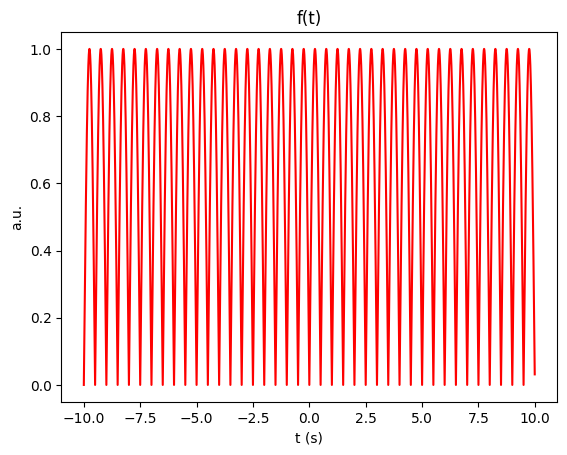

In [137]:
iFw = abs(ifft(Fw))
plt.plot(t,iFw, 'r-')
plt.title('f(t)')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
plt.show()

# Teorema de Parseval

Demuestra que la Transformada de Fourier es unitaria; es decir, que la suma (o la integral) del cuadrado de una función es igual a la suma (o a la integral) del cuadrado de su transformada.[1](https://es.wikipedia.org/wiki/Relaci%C3%B3n_de_Parseval)

$$ \sum_{n=0}^{N-1}|x_n|^2 = \frac{1}{N}\sum_{k=0}^{N-1}|X_k|^2$$

Veamos para el ejercicio anterior si esta relación se cumple

In [140]:
Fws = fft(ft)
entrada = sum(ft**2)
salida = 1/N * sum(abs(Fws)**2)# El factor de salida se encuentra multiplicado por un 1/N

print('Energía en plano de entrada = %f' % entrada)
print('Energía en plano Fourier = %f' % salida)

Energía en plano de entrada = 2000.000000
Energía en plano Fourier = 2000.000000


# Muestreo

## Teorema de Nyquist

Veamos un ejemplo práctico en el siguiente [Simulador](https://resources.nerdfirst.net/sampling)